In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import math
import seaborn as sn
from scipy.stats import pearsonr

In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
df = pd.read_csv("BTP Data-001/BTP Data/Process_Rainfall_Data/27Coimbatore-Parambikulam_processed.csv")

In [3]:
df

,Date,RF
0,1981-10-01,0.0
1,1981-10-02,0.0
2,1981-10-03,0.0
3,1981-10-04,0.0
4,1981-10-05,0.0
...,...,...
2764,2013-12-27,0.0
2765,2013-12-28,0.0
2766,2013-12-29,0.0
2767,2013-12-30,0.0


In [4]:
df = df.replace(-1.0,np.nan)

In [5]:
df

,Date,RF
0,1981-10-01,0.0
1,1981-10-02,0.0
2,1981-10-03,0.0
3,1981-10-04,0.0
4,1981-10-05,0.0
...,...,...
2764,2013-12-27,0.0
2765,2013-12-28,0.0
2766,2013-12-29,0.0
2767,2013-12-30,0.0


In [6]:
df = df.assign(RF=df.RF.interpolate(method='linear',limit_direction='both'))

In [7]:
df

,Date,RF
0,1981-10-01,0.0
1,1981-10-02,0.0
2,1981-10-03,0.0
3,1981-10-04,0.0
4,1981-10-05,0.0
...,...,...
2764,2013-12-27,0.0
2765,2013-12-28,0.0
2766,2013-12-29,0.0
2767,2013-12-30,0.0


In [8]:
df.isna().sum()

Date    0
RF      0
dtype: int64

In [9]:
tot_RF = []
latency = 7
dt = []
week = []
for i in range(0,len(df)-latency,latency):
    tot_RF.append(np.sum(df['RF'][i:i+latency]))
    dd = str(df['Date'][i])+ "~" + str(df['Date'][i+latency])
    dt.append(dd)

In [10]:
len(dt)

395

In [11]:
data = tot_RF
U = [min(data) , max(data)]

In [12]:
DATA = (data-U[0])/(U[1] - U[0])
Data = (np.array(DATA))
Data = np.reshape(Data , (Data.shape[0],1))

slt1 = int(0.70*len(data))
slt2 = int(0.80*len(data))
Train = Data[:slt1]
Val = Data[slt1:slt2]
Test = Data[slt1:]
DT = dt[slt1:]

In [13]:
x_axis = [i+1 for i in range(len(data))]
x_tr = x_axis[:slt1]
x_val = x_axis[slt1:slt2]
x_tst = x_axis[slt2:]
al = (U[1] - U[0]) + U[0]

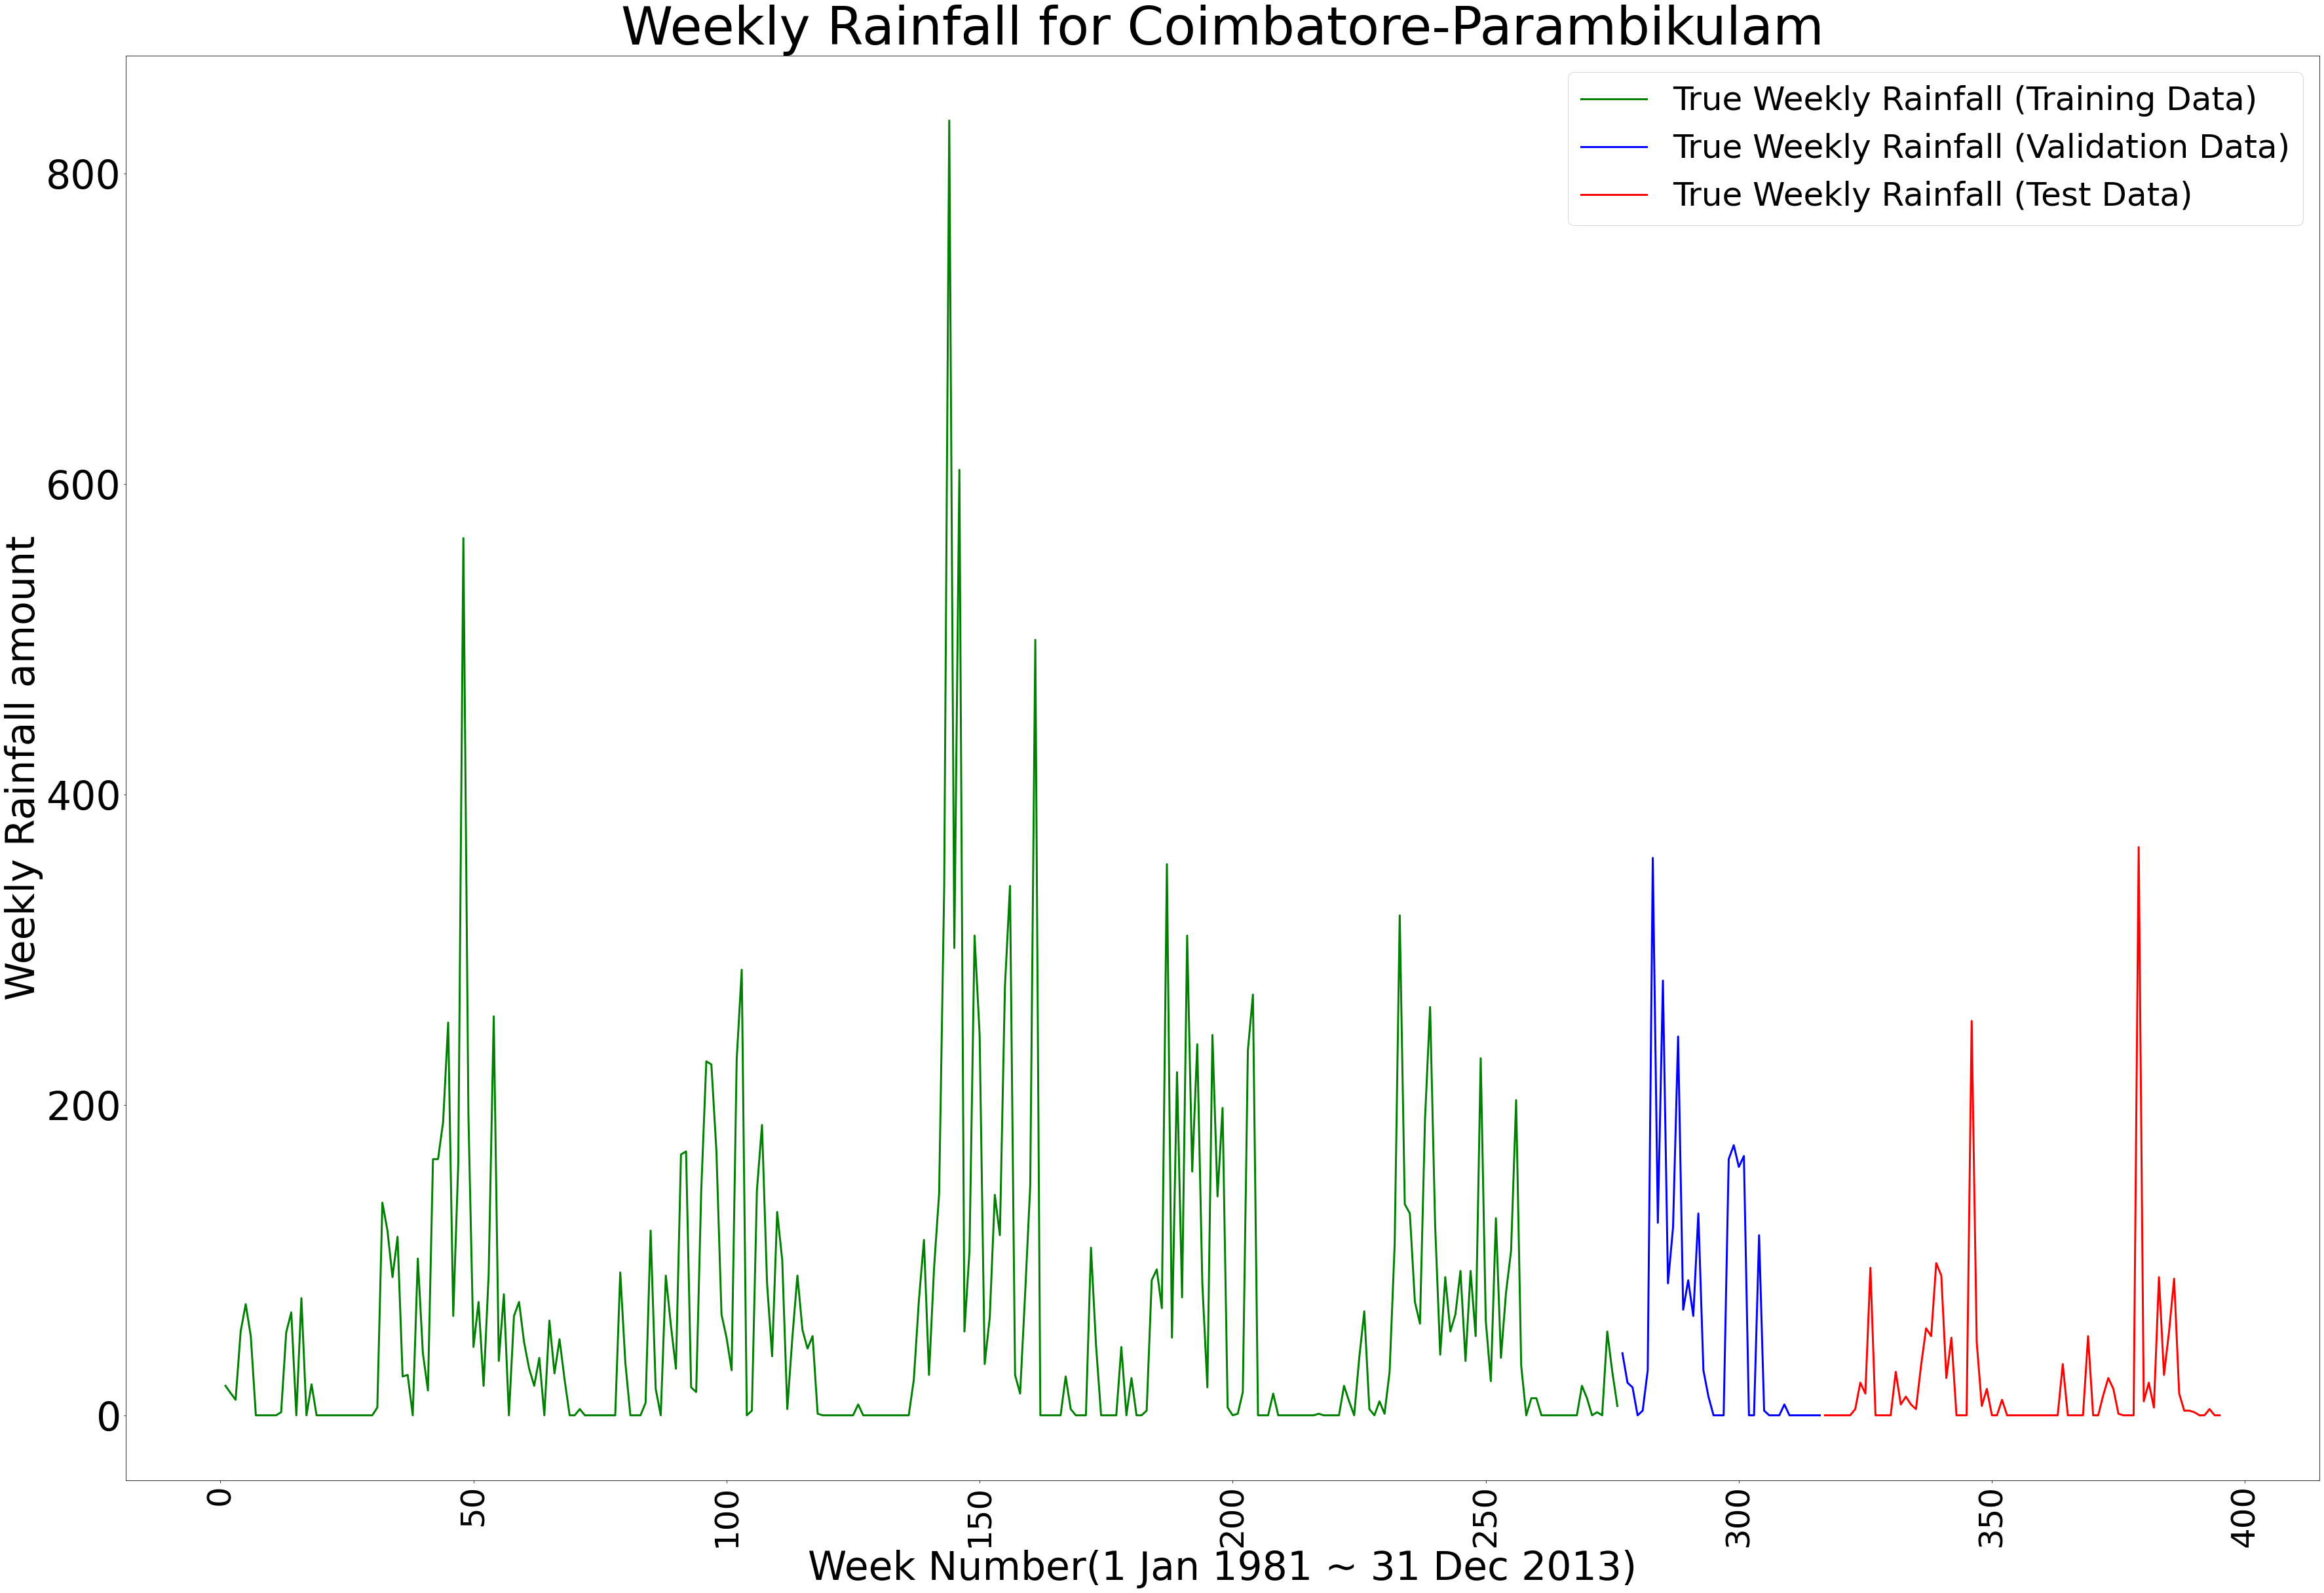

In [14]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
plt.title('Weekly Rainfall for Coimbatore-Parambikulam', fontsize = 80)
plt.xticks(fontsize=50, rotation=90)
plt.yticks(fontsize=60, rotation=0)
#plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Week Number(1 Jan 1981 ~ 31 Dec 2013)',fontsize=60)
plt.plot(x_tr, Train*al, 'g',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Training Data)')
plt.plot(x_val, Val*al, 'b',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Validation Data)')
plt.plot(x_tst, Data[slt2:]*al, 'r',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Test Data)')
plt.legend(loc='best',prop={'size': 50})

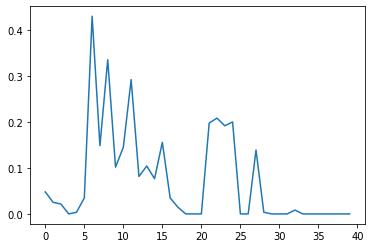

In [15]:
plt.plot(Val)

In [26]:
import GMM_K

numStates = 5
numMixtureComp = 2
dimension = 1
numIterations = 200
threshold = 0.0
covariance_type = 'full'
verbose = True


model = GMM_K.GmmHmmLikelihoodSimilarity_K(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold,
    covariance_type=covariance_type,
    verbose = True
)

In [27]:
logValues = model.train([Train])

         1          94.2574             +nan
         2         282.3812        +188.1238
         3         329.5913         +47.2100
         4         366.4860         +36.8947
         5         399.4951         +33.0091
         6         463.4116         +63.9165
         7         482.7419         +19.3302
         8         520.5710         +37.8291
         9         552.0918         +31.5208
        10         605.0858         +52.9940
        11         678.1321         +73.0464
        12         751.4688         +73.3367
        13         818.7903         +67.3215
        14         978.7931        +160.0028
        15        1532.1365        +553.3434
        16       31186.7076      +29654.5711
        17         797.0648      -30389.6428
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Cov

Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of 

Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.


Has model converged:  True


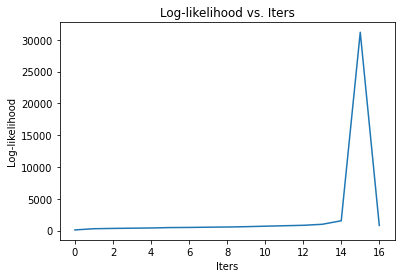

In [28]:
plt.plot(logValues, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
print('Has model converged: ', model.model.monitor_.converged)

In [33]:
K = len(Train)
rmse = []
MAE = []
CC = []
for k in range(1,K):
    pred = model.predict(Val,k)
    p2 = pred*(U[1] - U[0]) + U[0]
    T1 = Val*(U[1] - U[0]) + U[0]
    rmse.append(mean_squared_error(p2, T1, squared=False))
    MAE.append(mae(T1,p2))
    d1 = np.array(T1)
    d1 = np.reshape(d1 , d1.shape[0])
    d2 = np.array(p2)
    d2 = np.reshape(d2 , d2.shape[0])
    corr, _ = pearsonr(d1, d2)
    CC.append(corr)
    print(k)

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

1
2


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

3
4


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

5
6


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

7
8


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

9
10


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

11
12


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

13
14


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

15


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

16
17


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

18
19


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

20
21


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

22
23


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

24
25


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

26
27


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

28
29


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

30
31


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

32
33


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

34
35


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

36
37


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

38
39


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

40
41


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

42
43


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

44
45


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

46
47


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

48
49


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

50
51


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

52
53


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

54
55


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

56
57


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

58
59


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

60
61


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

62
63


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

64
65


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

66
67


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

68
69


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

70
71


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

72
73


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

74
75


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

76
77


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

78
79


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

80
81


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

82
83


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

84
85


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

86
87


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

88
89


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

90
91


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

92
93


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

94
95


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

96
97


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

98
99


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

100
101


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

102
103


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

104
105


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

106
107


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

108
109


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

110
111


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

112
113


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

114
115


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

116
117


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

118
119


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

120
121

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

122
123


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

124
125


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

126
127


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

128
129


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

130
131


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

132


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

133
134


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

135
136


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

137
138


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

139
140


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

141
142


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

143
144


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

145
146


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

147
148


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

149
150


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

151
152


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

153
154


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

155
156


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

157
158


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

159
160


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

161
162


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

163
164


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

165
166


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

167
168


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

169
170


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

171
172


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

173
174


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

175
176


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

177
178


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

179
180


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

181
182


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

183
184


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

185
186


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

187
188


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

189


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

190
191


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

192
193


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

194
195


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

196
197


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

198
199


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

200


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

201
202


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

203
204


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

205
206


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

207
208


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

209
210


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

211
212


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

213
214


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

215
216


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

217
218


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

219
220


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

221


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

222
223


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

224
225


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

226
227


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

228
229


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

230
231


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

232
233


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

234
235


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

236
237

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 


238


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

239
240


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

241
242


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

243
244


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

245
246


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

247
248


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

249
250


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

251
252


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

253


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

254
255


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

256
257


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

258
259


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

260


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

261
262


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

263


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

264


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

265
266


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

267
268


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

269
270


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

271
272


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

273
274


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

275


In [34]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (50,10))
# ax1.set_xlim(1, K)
# ax1.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax1.set_ylabel('RMSE', fontweight ='bold', fontsize = 30)
# ax1.grid(True)
# ax1.set_title('RMSE vs K', fontsize = 30, fontweight ='bold')
# ax1.plot(rmse, linewidth='5')
# ax1.tick_params(axis='both', which='major', labelsize=30)


# ax2.set_xlim(1, K)
# ax2.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax2.set_ylabel('MAE', fontweight ='bold', fontsize = 30)
# ax2.grid(True)
# ax2.set_title('MAE vs K', fontsize = 30, fontweight ='bold')
# ax2.plot(MAE, linewidth='5')
# ax2.tick_params(axis='both', which='major', labelsize=30)

# ax3.set_xlim(1, K)
# ax3.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax3.set_ylabel('CC', fontweight ='bold', fontsize = 30)
# ax3.grid(True)
# ax3.set_title('CC vs K', fontsize = 30, fontweight ='bold')
# ax3.plot(CC, linewidth='5')
# ax3.tick_params(axis='both', which='major', labelsize=30)


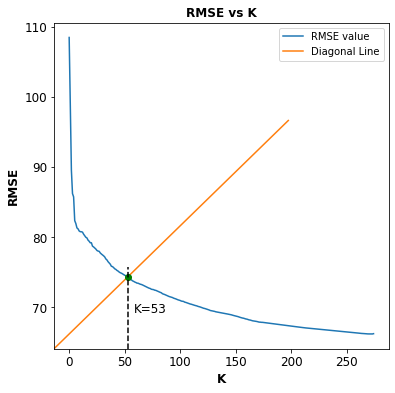

In [39]:
th = 53
st = 'K='+str(th)
f, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('K', fontweight ='bold', fontsize = 12)
ax.set_ylabel('RMSE', fontweight ='bold', fontsize = 12)
ax.set_title('RMSE vs K', fontsize = 12, fontweight ='bold')
ax.plot(rmse, '-' , label = 'RMSE value')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot([0, 0.7], [0, 0.7], transform=ax.transAxes, label = 'Diagonal Line')
ax.plot(th, rmse[th-1], 'go')
ax.axvline(x=th , ymax = 0.25,ls='--',c='black')
ax.text(th+5, rmse[th-1]-5, st, fontsize=12)
ax.legend()

In [29]:
pred = model.predict(Test,len(Train))
p2 = pred*(U[1] - U[0]) + U[0]
T1 = Test*(U[1] - U[0]) + U[0]

Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of 

In [30]:
len(DT)

119

In [31]:
xaxis = [DT[i] for i in range(0,len(DT),10)]
ticks = [i+1 for i in range(0,len(DT),10)]

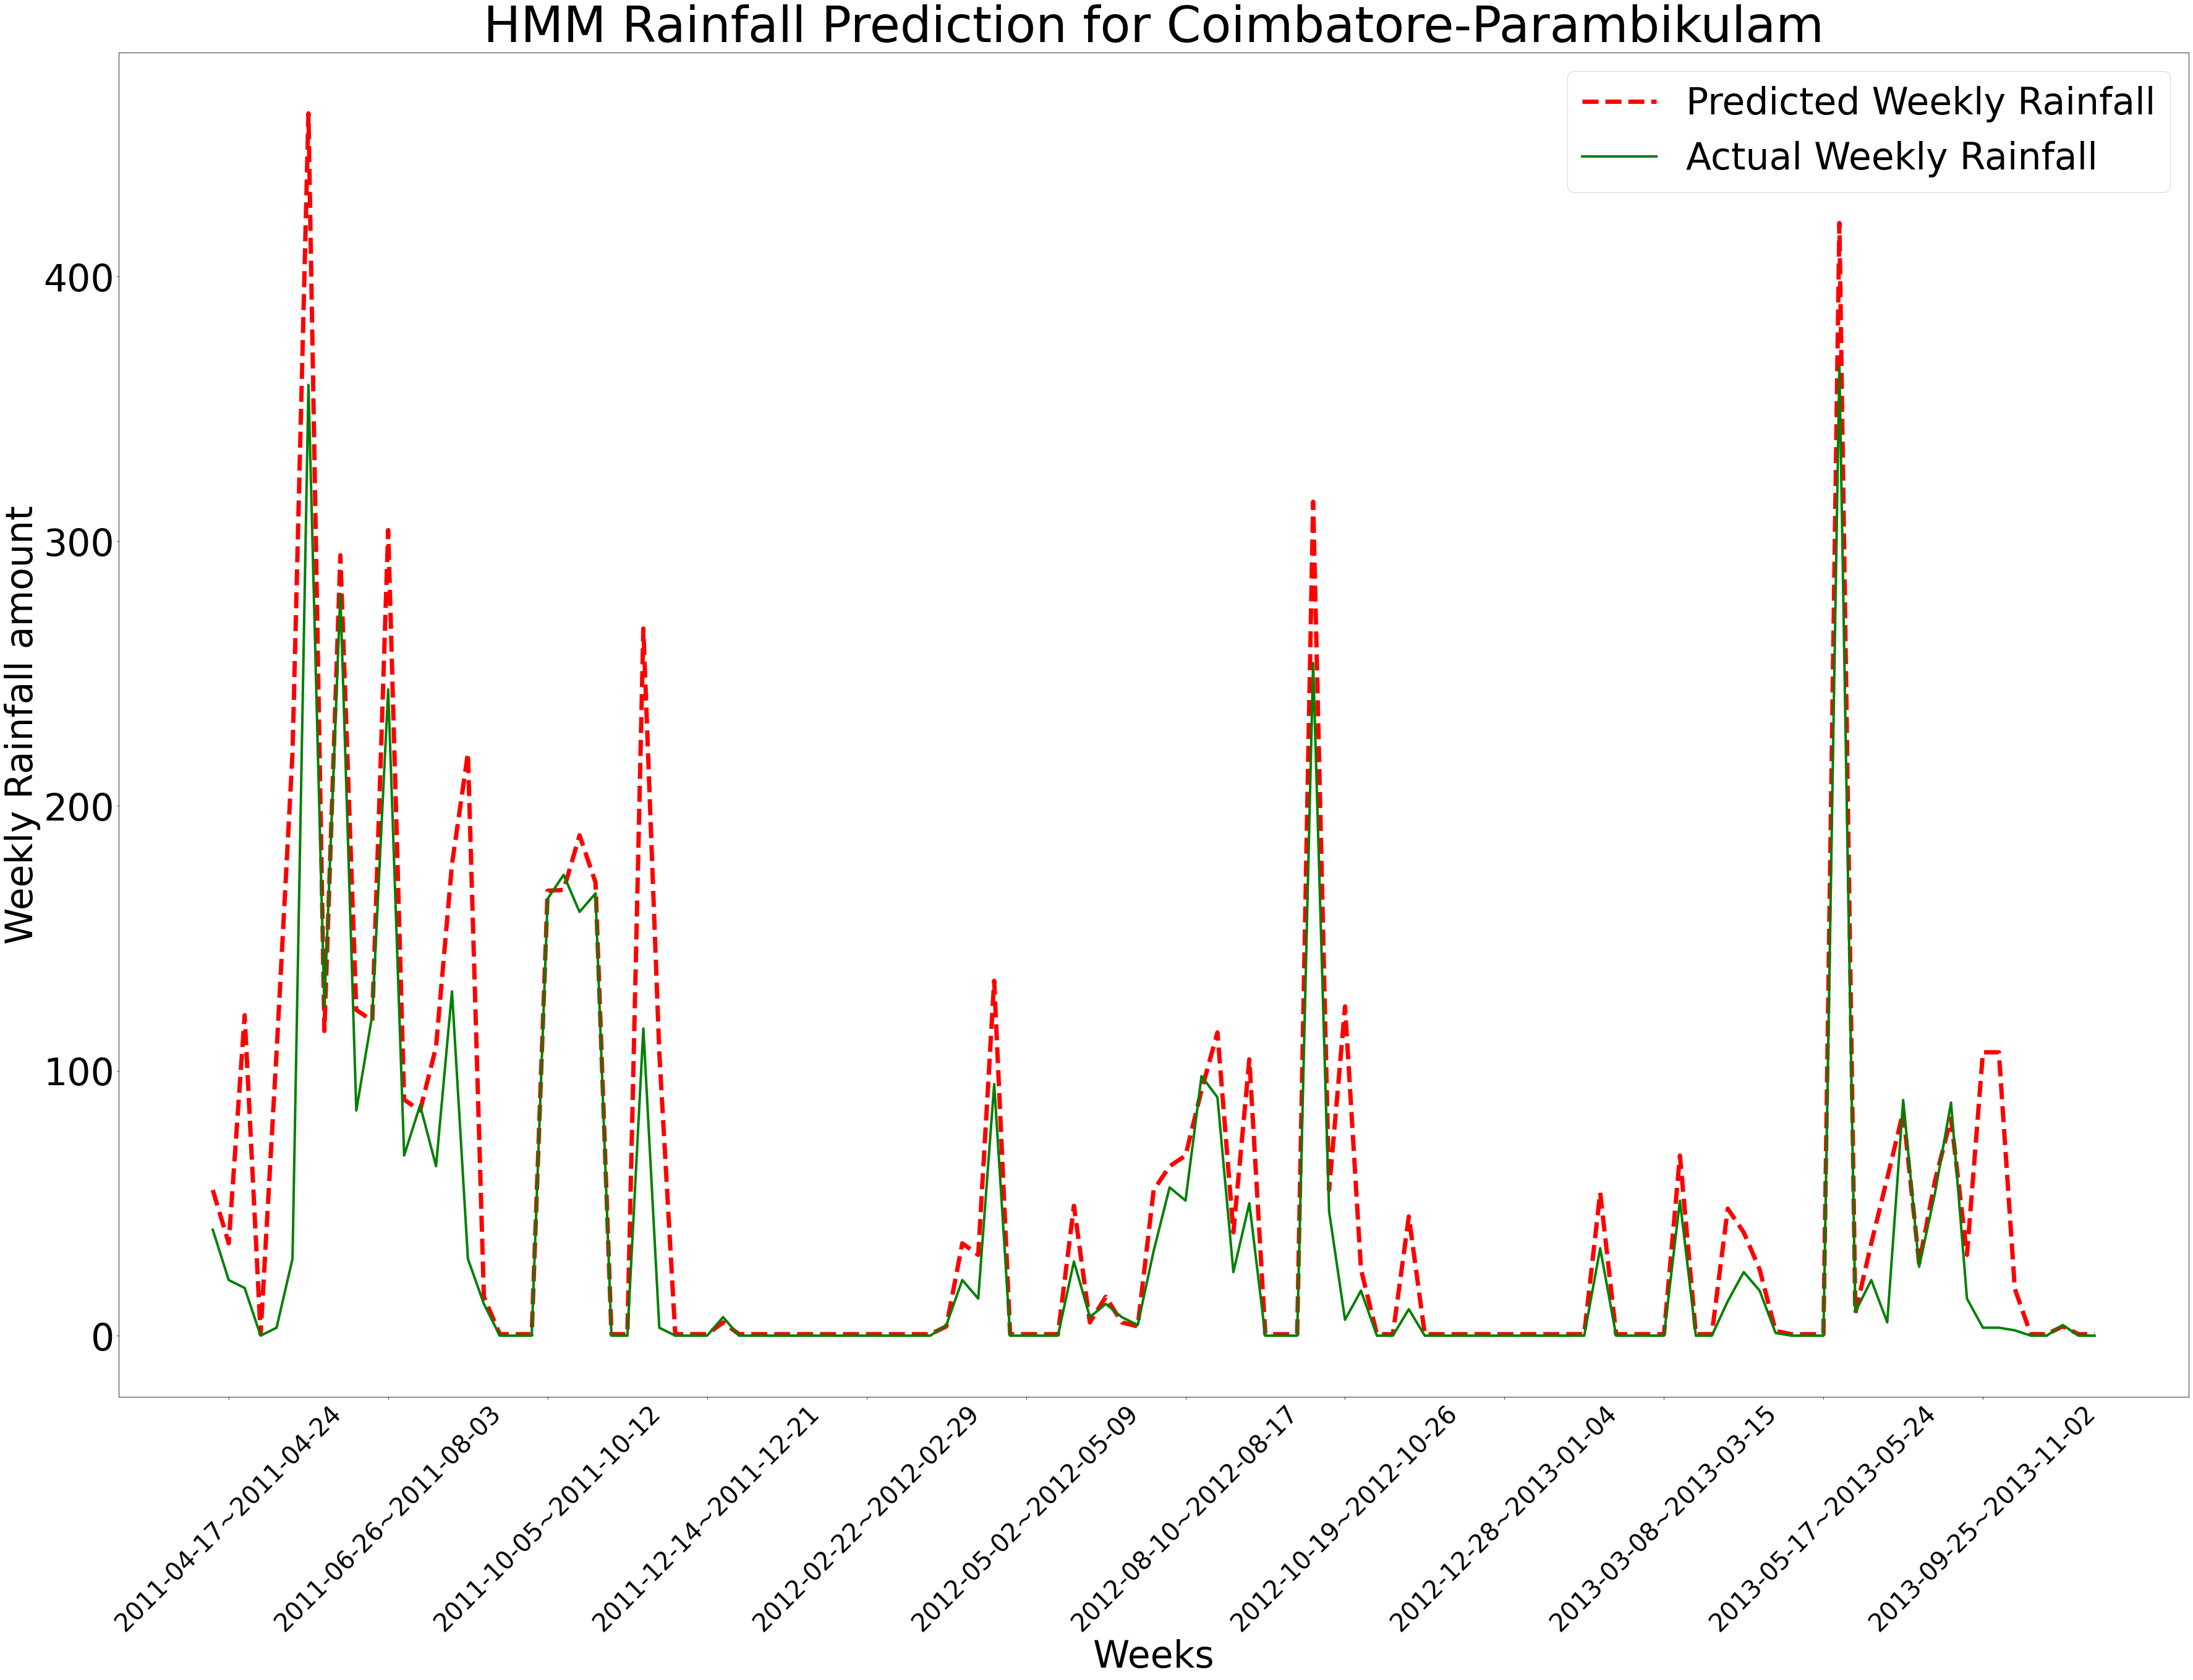

In [42]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
#plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('HMM Rainfall Prediction for Coimbatore-Parambikulam', fontsize = 80)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=60, rotation=0)
plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Weeks',fontsize=60)
plt.plot(p2-9, 'r', linestyle='--', linewidth='7', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='4', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 60})

In [43]:
mean_squared_error(T1, p2-9, squared=False)

41.68022252831357

In [44]:
mae(T1,p2-9)

18.860457450091445

In [45]:
d1 = np.array(T1)
d1 = np.reshape(d1 , d1.shape[0])
d2 = np.array(p2)
d2 = np.reshape(d2 , d2.shape[0])

corr, _ = pearsonr(d1, d2)
corr

0.90919867725626